In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import shutil, os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from metpy.calc import wind_components
from metpy.units import units

In [4]:
#%%
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

plt.rc('font', family='serif',size = 16)  # controls default text layout
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title


In [5]:
#read and concatenate files
def combine_files(source_folder):
    #source_folder = r'Tower_Data/Kettle_Ponds/KPA22_001-365_full/'
    file_list = os.listdir(source_folder)    
    os.chdir(source_folder)

    data_combined = pd.DataFrame()

    for i, file_name in enumerate(file_list):
        print('Reading..' + file_list[i])
        df = pd.read_table(file_list[i],delimiter=r"\s+",skiprows = [1])
        data_combined = pd.concat([data_combined,df],ignore_index=True)
    return(data_combined)

#filter for qc flags
def flux_qc(flux_df):
    #NAN filter
    H_f1 = flux_df['H']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1
    #magnitude flag
    H_f3 = abs(flux_df['H'])>10

    LE_f1 = flux_df['LE']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    Tau_f1 = flux_df['qc_Tau'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & H_f3 & LE_f1 & LE_f2 & Tau_f1])




In [6]:
pwd()

'/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH'

In [7]:
KPA_data_22 = combine_files('/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPA22_001-365_full')
KPB_data_22 = combine_files('/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPB22_001-365_full')

Reading..2022-01-01_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-02_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-03_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-04_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-05_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-06_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-07_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-08_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-09_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-10_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-11_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-12_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-13_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-14_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-15_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-16_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-17_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-18_smart3-00568-tower_EP-Summary.txt
Reading..2022-01-19_smart3-0

(-2.0, 0.5)

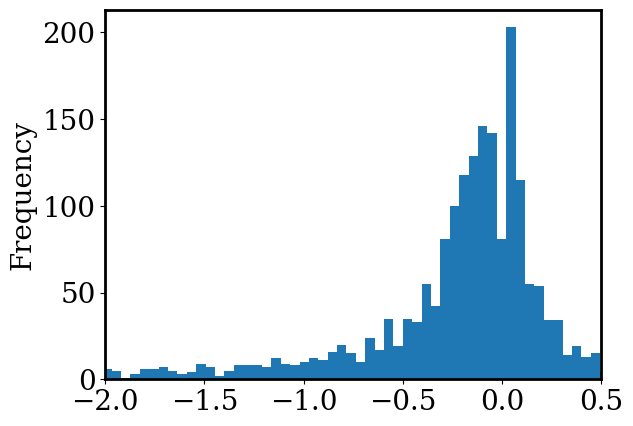

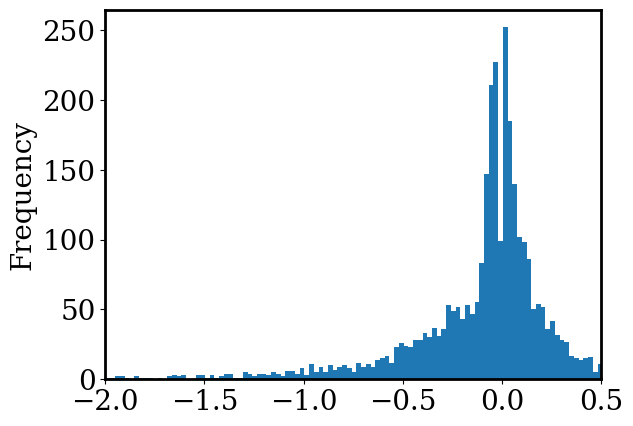

In [9]:
KPA_flux_df_22 = flux_qc(KPA_data_22).copy()
KPB_flux_df_22 = flux_qc(KPB_data_22).copy()

plt.figure()
ax1 = KPA_flux_df_22['(z-d)/L'].plot.hist(bins=1000)
ax1.set_xlim([-2,0.5])

plt.figure()
ax2 = KPB_flux_df_22['(z-d)/L'].plot.hist(bins=1000)
ax2.set_xlim([-2,0.5])

In [153]:
KPA_flux_df_22.columns.values

array(['DATAH', 'filename', 'date', 'time', 'DOY', 'daytime',
       'file_records', 'used_records', 'Tau', 'qc_Tau', 'rand_err_Tau',
       'H', 'qc_H', 'rand_err_H', 'LE', 'qc_LE', 'rand_err_LE',
       'co2_flux', 'qc_co2_flux', 'rand_err_co2_flux', 'h2o_flux',
       'qc_h2o_flux', 'rand_err_h2o_flux', 'ch4_flux', 'qc_ch4_flux',
       'rand_err_ch4_flux', 'none_flux', 'qc_none_flux',
       'rand_err_none_flux', 'H_strg', 'LE_strg', 'co2_strg', 'h2o_strg',
       'ch4_strg', 'none_strg', 'co2_v-adv', 'h2o_v-adv', 'ch4_v-adv',
       'none_v-adv', 'co2_molar_density', 'co2_mole_fraction',
       'co2_mixing_ratio', 'co2_time_lag', 'co2_def_timelag',
       'h2o_molar_density', 'h2o_mole_fraction', 'h2o_mixing_ratio',
       'h2o_time_lag', 'h2o_def_timelag', 'ch4_molar_density',
       'ch4_mole_fraction', 'ch4_mixing_ratio', 'ch4_time_lag',
       'ch4_def_timelag', 'none_molar_density', 'none_mole_fraction',
       'none_mixing_ratio', 'none_time_lag', 'none_def_timelag',
       

In [10]:
KPA_flux_df_22['date_time'] = pd.to_datetime(KPA_flux_df_22.date + ' ' + KPA_flux_df_22['time'])
KPB_flux_df_22['date_time'] = pd.to_datetime(KPB_flux_df_22.date + ' ' + KPB_flux_df_22['time'])

In [11]:
KPA_flux_df_22['date'] = pd.to_datetime(KPA_flux_df_22.date)
KPB_flux_df_22['date'] = pd.to_datetime(KPB_flux_df_22.date)


#### Scaled variance plots (MOST):

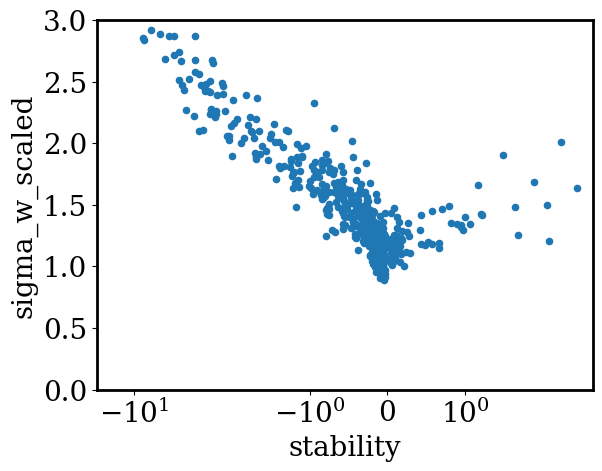

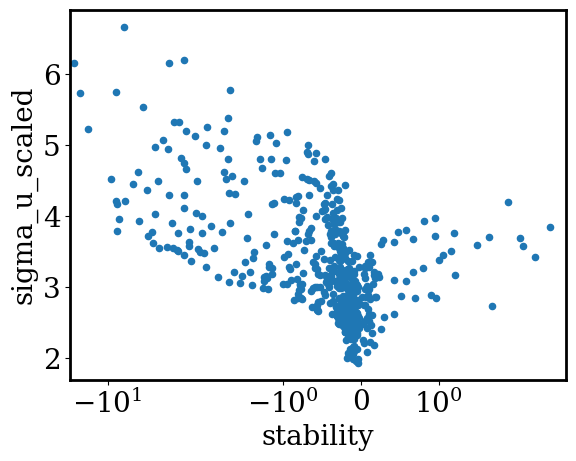

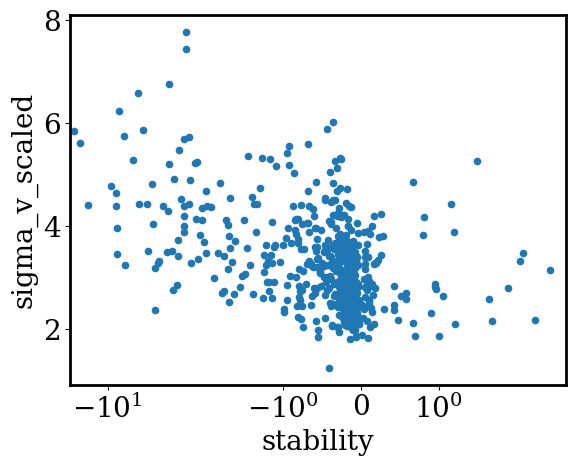

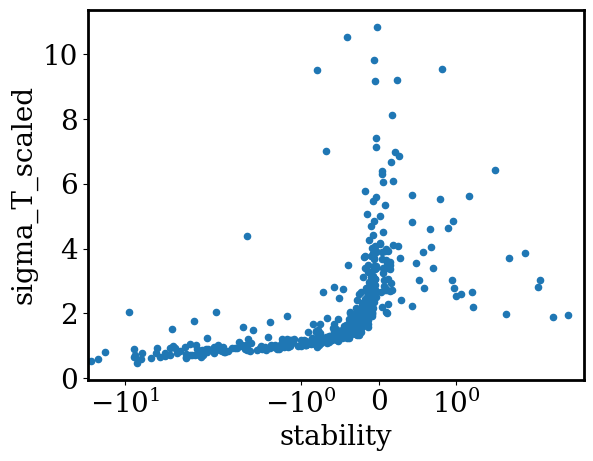

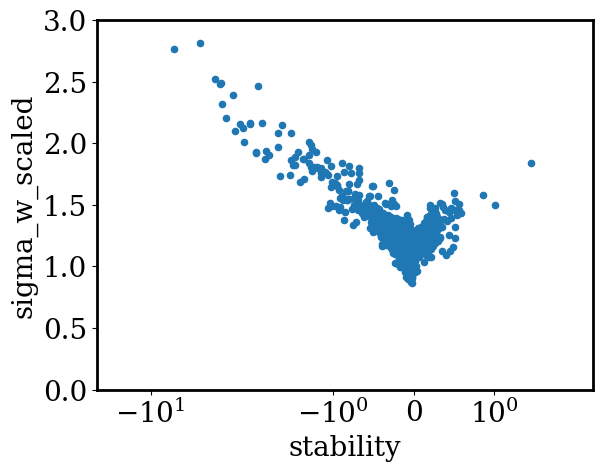

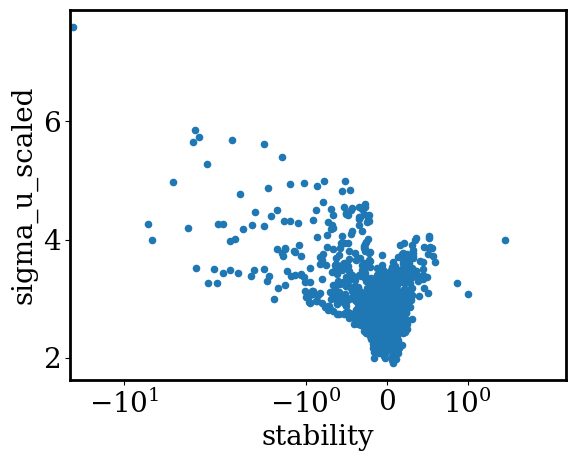

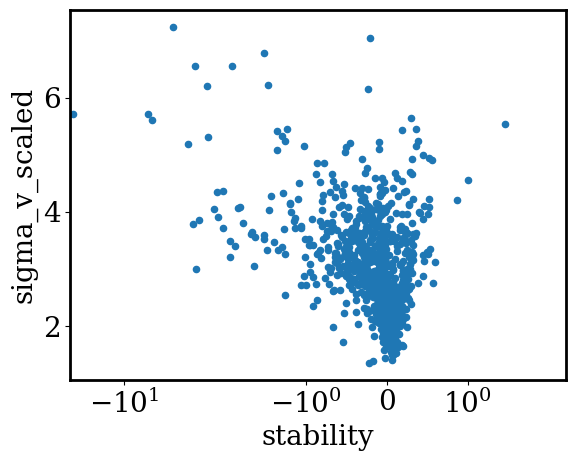

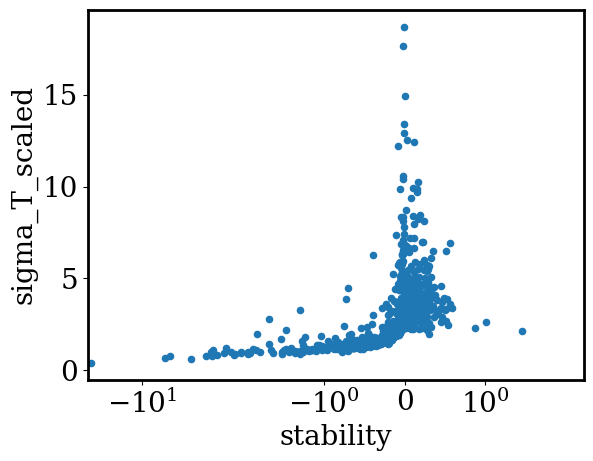

In [12]:
#a simple scaled plot of sigma_w for now, as a function of stability
def subset_plot(flux_df_22):
    plot_sigmaw_df = pd.DataFrame()
    plot_sigmaw_df['sigma_w_scaled'] = np.sqrt(flux_df_22['w_var'])/flux_df_22['u*']
    plot_sigmaw_df['sigma_u_scaled'] = np.sqrt(flux_df_22['u_var'])/flux_df_22['u*']
    plot_sigmaw_df['sigma_v_scaled'] = np.sqrt(flux_df_22['v_var'])/flux_df_22['u*']
    plot_sigmaw_df['sigma_T_scaled'] = np.sqrt(flux_df_22['ts_var'])/np.abs(flux_df_22['T*'])
    plot_sigmaw_df['stability'] = flux_df_22['(z-d)/L']


    ax1 = plot_sigmaw_df.plot.scatter(x='stability', y='sigma_w_scaled')
    ax1.set_ylim([0,3])
    ax1.set_xscale('symlog')
    # ax1.invert_xaxis()

    ax2 = plot_sigmaw_df.plot.scatter(x='stability', y='sigma_u_scaled')
    ax2.set_xscale('symlog')
    # ax2.invert_xaxis()

    ax3 = plot_sigmaw_df.plot.scatter(x='stability', y='sigma_v_scaled')
    ax3.set_xscale('symlog')
    
    ax4 = plot_sigmaw_df.plot.scatter(x='stability', y='sigma_T_scaled')
    ax4.set_xscale('symlog')
# ax3.invert_xaxis()

date_flag1 = KPA_flux_df_22.date.dt.month >= 8
date_flag2 = KPA_flux_df_22.date.dt.month <= 9
KPA_plot_df = KPA_flux_df_22.loc[date_flag1 & date_flag2]

date_flag1 = KPB_flux_df_22.date.dt.month >= 8
date_flag2 = KPB_flux_df_22.date.dt.month <= 9
KPB_plot_df = KPB_flux_df_22.loc[date_flag1 & date_flag2]

subset_plot(KPA_plot_df)
subset_plot(KPB_plot_df)


I don't think the horizontal velocity variances scale as well. 

#### Checkout nondimensional profile/gradient scaling

In [13]:
#reading data from the kettle ponds minute data file
input_path = '/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds'
os.chdir(input_path)
kp_met_df = pd.read_csv("KP22_001-365-MET.csv")


/tmp/ipykernel_194/1931388914.py:4: DtypeWarning: Columns (3,4,11,30,46) have mixed types. Specify dtype option on import or set low_memory=False.
  kp_met_df = pd.read_csv("KP22_001-365-MET.csv")


In [14]:
kp_met_df["wsp_10m_num"] = pd.to_numeric(kp_met_df.wsp_10m, errors='coerce')
kp_met_df["wsp_05m_num"] = pd.to_numeric(kp_met_df.wsp_5m, errors='coerce')
kp_met_df["wsp_03m_num"] = pd.to_numeric(kp_met_df.wsp_3m, errors='coerce')
kp_met_df["dir_10m_num"] = pd.to_numeric(kp_met_df.dir_10m, errors='coerce')

wd_qc_f =  kp_met_df.dir_10m_num > 0
kp_met_df_qc =  kp_met_df.loc[wd_qc_f].copy()
kp_met_df_qc["date_time"] = pd.to_datetime(kp_met_df_qc["date time(MST)"],format='%m/%d/%Y %H:%M')

kp_met_df_qc.set_index('date_time', inplace = True)
kp_met_winds_df_qc_30min = kp_met_df_qc[['wsp_10m_num','wsp_05m_num','wsp_03m_num']].resample('30T').mean()

#KPA_flux_df_22 = KPA_flux_df_22.copy()
#KPA_flux_df_22['date_time(MST)'] = pd.to_datetime(KPA_flux_df_22['date'] + ' ' + KPA_flux_df_22['time'])

KPA_flux_df_22_winds = pd.merge(KPA_plot_df,kp_met_winds_df_qc_30min, on='date_time', how='left')


In [84]:
def plot_scaled_gradients(KPA_flux_df_22_var,var1,var2,delta_z,momentum_flag):
    #var1 on top, var2 below
    plot_gradients_df = pd.DataFrame()
    plot_gradients_df['delta_var'] = KPA_flux_df_22_var[var1] - KPA_flux_df_22_var[var2]
    plot_gradients_df['delta_z'] = delta_z
    plot_gradients_df['u*'] = KPA_flux_df_22_var['u*']
    plot_gradients_df['stability'] = KPA_flux_df_22_var['(z-d)/L']
    von_karman = 0.4
    z_meas = 10.
    plot_gradients_df['grad_scaled'] = (von_karman*z_meas/(plot_gradients_df['u*']))*(plot_gradients_df['delta_var']/plot_gradients_df['delta_z'])


    x_plot_unstable = np.arange(plot_gradients_df['stability'].min(),0,0.1)
    x_plot_stable = np.arange(0,plot_gradients_df['stability'].max(),0.05)

    ax3 = plot_gradients_df.plot.scatter(x='stability', y='grad_scaled')
    ax3.set_xscale('symlog')

    ax1 = plot_gradients_df.loc[plot_gradients_df['stability']<0].plot.scatter(x='stability', y='grad_scaled')
    ax1.set_ylim([0,3])
    ax1.set_xscale('symlog')
    if momentum_flag==True: ax1 = plt.plot(x_plot_unstable,(1-15*x_plot_unstable)**(-0.25),'r')
    if momentum_flag!=True: ax1 = plt.plot(x_plot_unstable,0.74*(1-9*x_plot_unstable)**(-0.5),'r')

    plt.figure()
    ax2 = plot_gradients_df.loc[plot_gradients_df['stability']>0].plot.scatter(x='stability', y='grad_scaled')
    ax2.set_xlim([0,1])
    #ax2.set_ylim([0,10])
    ax2.set_xscale('symlog')
    if momentum_flag==True: ax2 = plt.plot(x_plot_stable,(1+4.7*x_plot_stable),'k')
    if momentum_flag!=True: ax1 = plt.plot(x_plot_stable,(0.74+4.7*x_plot_stable),'k')




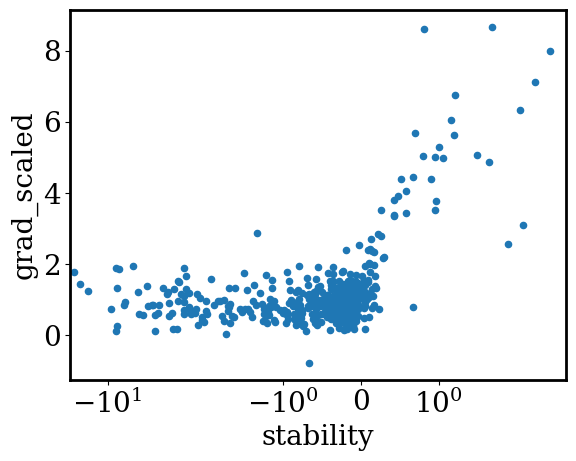

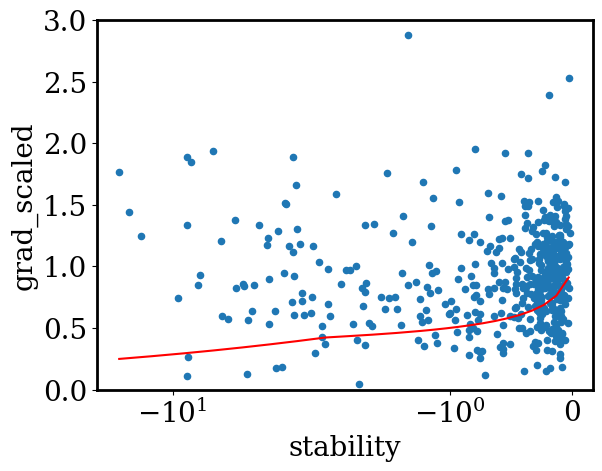

<Figure size 640x480 with 0 Axes>

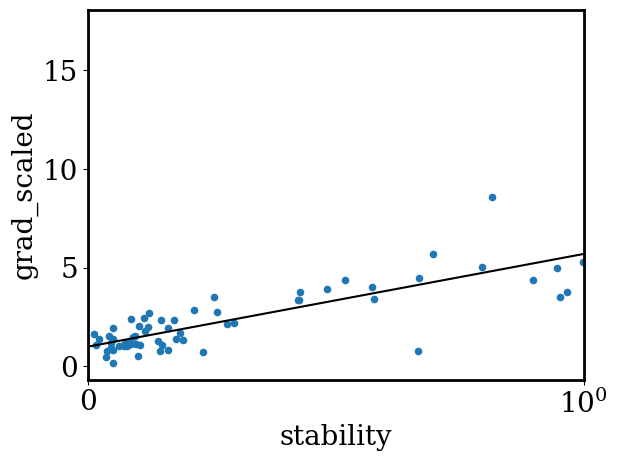

In [85]:
plot_scaled_gradients(KPA_flux_df_22_winds,'wsp_10m_num','wsp_03m_num',7.,True)

In [202]:
#Repeat for temp and humidity

In [40]:
def met_data_qc(df_in, var):
    filter = df_in[var]!=-999
    df_out = df_in.loc[filter]
    return(df_out)

var_list = ['Tair1_10m','Tair2_10m','Tair1_5m','Tair2_5m']

for i,var_ in enumerate(var_list):
    new_var = var_+'_qc'
    kp_met_df[new_var] = met_data_qc(kp_met_df,var_list[i])[var_list[i]]

kp_met_df['Tair_10m_qc_mean'] = (kp_met_df['Tair1_10m_qc']+kp_met_df['Tair2_10m_qc'])/2
kp_met_df['Tair_5m_qc_mean'] = (kp_met_df['Tair1_5m_qc']+kp_met_df['Tair2_5m_qc'])/2

kp_met_df_temp_qc  = kp_met_df.copy()
kp_met_df_temp_qc["date_time"] = pd.to_datetime(kp_met_df_temp_qc["date time(MST)"],format='%m/%d/%Y %H:%M')

kp_met_df_temp_qc.set_index('date_time', inplace = True)
kp_met_df_temp_qc_30min = kp_met_df_temp_qc[['Tair_10m_qc_mean','Tair_5m_qc_mean']].resample('30T').mean()

# #adding the 3m data also
f = kp_met_df.Tair1_3m!= -999

# kp_met_df.loc[filter].Tair2_3m
Tair_3m_qc_mean = pd.DataFrame()
Tair_3m_qc_mean['Tair_3m_qc_mean'] = (kp_met_df.loc[f]['Tair1_3m']+kp_met_df.loc[f]['Tair2_3m'])/2
Tair_3m_qc_mean["date_time"] = pd.to_datetime(kp_met_df.loc[f]["date time(MST)"],format='%m/%d/%Y %H:%M')
Tair_3m_qc_mean.set_index('date_time',inplace=True)

kp_met_df_temp_qc_30min['Tair_3m_qc_mean'] = Tair_3m_qc_mean['Tair_3m_qc_mean'].resample('30T').mean()
KPA_flux_df_22_temp = pd.merge(KPA_plot_df,kp_met_df_temp_qc_30min, on='date_time', how='left')


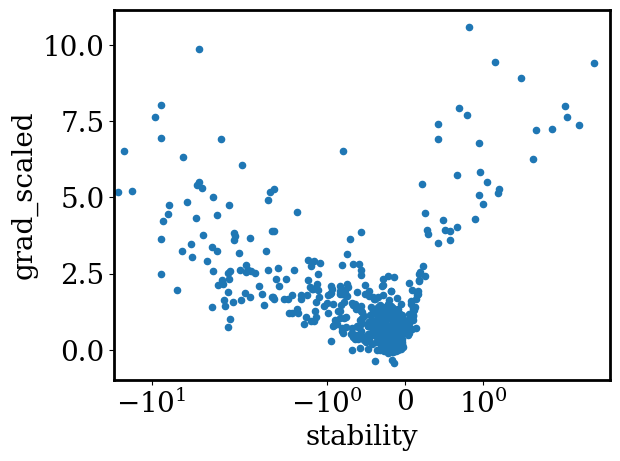

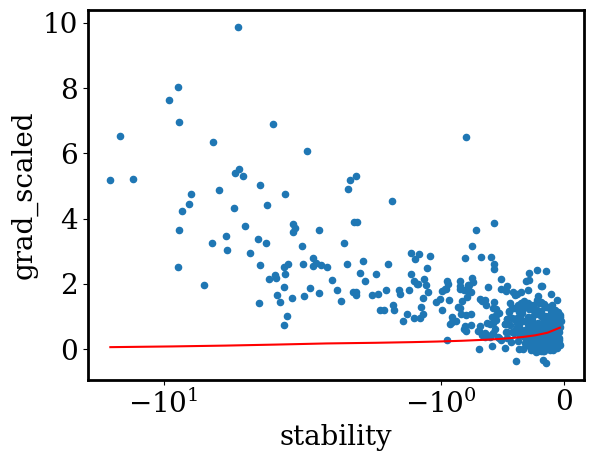

<Figure size 640x480 with 0 Axes>

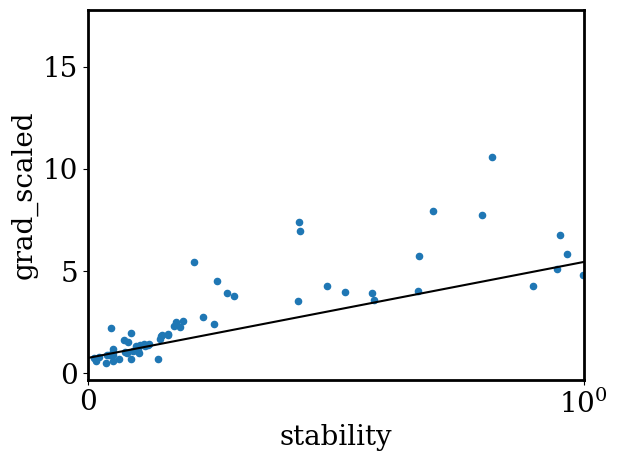

In [45]:
plot_scaled_gradients(KPA_flux_df_22_temp,'Tair_10m_qc_mean','Tair_5m_qc_mean',5.,False)


During stable conditions the MOST Businger Dyer relationships seem to hold good. Interesting.

#### Trying to fit a MOST curve to $\phi_m$ vs $\zeta$ plot

In [22]:
def scaled_gradients(KPA_flux_df_22_var,var1,var2,delta_z,momentum_flag):
    #var1 on top, var2 below
    plot_gradients_df = pd.DataFrame()
    plot_gradients_df['delta_var'] = KPA_flux_df_22_var[var1] - KPA_flux_df_22_var[var2]
    plot_gradients_df['delta_z'] = delta_z
    plot_gradients_df['u*'] = KPA_flux_df_22_var['u*']
    plot_gradients_df['stability'] = KPA_flux_df_22_var['(z-d)/L']
    von_karman = 0.4
    z_meas = 10.
    plot_gradients_df['grad_scaled'] = (von_karman*z_meas/(plot_gradients_df['u*']))*(plot_gradients_df['delta_var']/plot_gradients_df['delta_z'])

    return plot_gradients_df

    # x_plot_unstable = np.arange(plot_gradients_df['stability'].min(),0,0.1)
    # x_plot_stable = np.arange(0,plot_gradients_df['stability'].max(),0.05)

    # ax3 = plot_gradients_df.plot.scatter(x='stability', y='grad_scaled')
    # ax3.set_xscale('symlog')

    # ax1 = plot_gradients_df.loc[plot_gradients_df['stability']<0].plot.scatter(x='stability', y='grad_scaled')
    # #ax1.set_ylim([0,3])
    
    # ax1.set_xscale('symlog')
    # if momentum_flag==True: ax1 = plt.plot(x_plot_unstable,(1-15*x_plot_unstable)**(-0.25),'r')
    # if momentum_flag!=True: ax1 = plt.plot(x_plot_unstable,0.74*(1-9*x_plot_unstable)**(-0.5),'r')

    # plt.figure()
    # ax2 = plot_gradients_df.loc[plot_gradients_df['stability']>0].plot.scatter(x='stability', y='grad_scaled')
    # ax2.set_xlim([0,1])
    # #ax2.set_ylim([0,10])
    # ax2.set_xscale('symlog')
    # if momentum_flag==True: ax2 = plt.plot(x_plot_stable,(1+4.7*x_plot_stable),'k')
    # if momentum_flag!=True: ax1 = plt.plot(x_plot_stable,(0.74+4.7*x_plot_stable),'k')


In [23]:
winds_scaled_gradient_df = scaled_gradients(KPA_flux_df_22_winds,'wsp_10m_num','wsp_03m_num',7.,True)

In [163]:
#winds_scaled_gradient_df

winds_scaled_gradient_unstable_df = pd.DataFrame()
unstable_filter = winds_scaled_gradient_df['stability']<0
filter_1 = winds_scaled_gradient_df['stability']>-2

winds_scaled_gradient_unstable_df['stability'] = winds_scaled_gradient_df.loc[(unstable_filter & filter_1)]['stability']
winds_scaled_gradient_unstable_df['grad_scaled'] = winds_scaled_gradient_df.loc[((unstable_filter & filter_1))]['grad_scaled']



For MOST, during unstable cases $\phi_m$ scales as $\alpha_m$(1 - $\beta_m$ $\zeta$)$^{-1/4}$

In [26]:
from scipy import optimize

In [143]:
def phi_m_MOST_unstable(zeta, alpha_m, beta_m):

    return alpha_m*(1 - beta_m*zeta)**(-0.25)



alpha_m  1.2489713004500693 beta_m  10.000000000000002


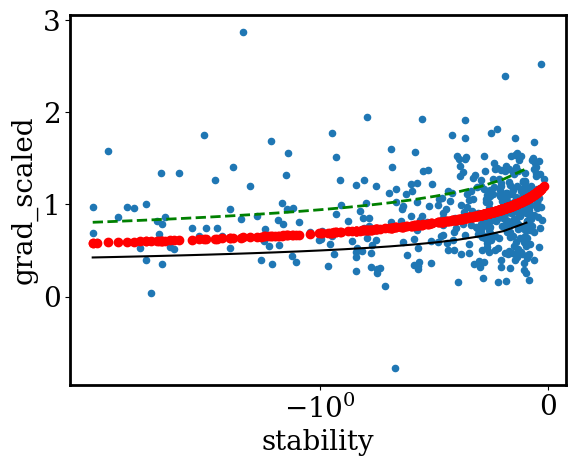

In [149]:
xdata = winds_scaled_gradient_unstable_df['stability'].values
ydata = winds_scaled_gradient_unstable_df['grad_scaled'].values

popt_unstable, pcov_unstable = optimize.curve_fit(phi_m_MOST_unstable, xdata, ydata, bounds=([0,10], [2, 30.]))

print('alpha_m ', popt_unstable[0],'beta_m ',popt_unstable[1])


ax1 = winds_scaled_gradient_unstable_df.plot.scatter(x='stability', y='grad_scaled')
#ax1.set_ylim([0,3])

ax1.scatter(xdata,phi_m_MOST_unstable(xdata,*popt_unstable),color='r')

ax1.set_xscale('symlog')

x_plot_unstable = np.arange(xdata.min(),0,0.1)

ax1.plot(x_plot_unstable,(1-15*x_plot_unstable)**(-0.25),'k-')
ax1.plot(x_plot_unstable,1.57*(1-6.71*x_plot_unstable)**(-0.25),'g--',linewidth=2)


    

nu_m  1.1530468681929738 eta_m  3.579161546877795


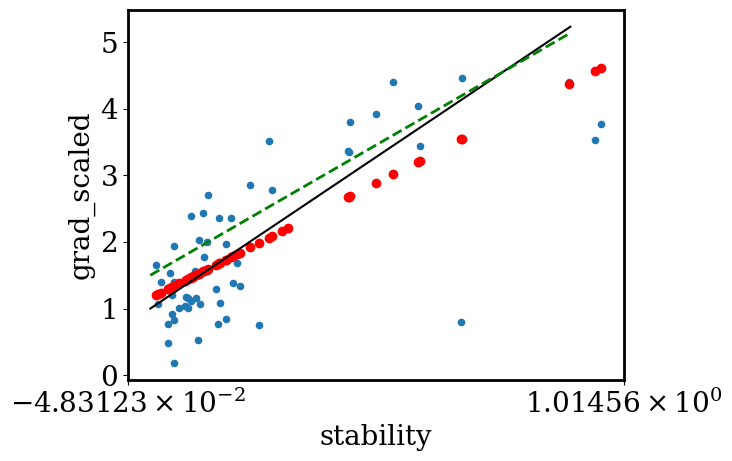

In [168]:
winds_scaled_gradient_stable_df = pd.DataFrame()
stable_filter = winds_scaled_gradient_df['stability']>0
filter_2 = winds_scaled_gradient_df['stability']<1
filter_3 = winds_scaled_gradient_df['grad_scaled']<5


winds_scaled_gradient_stable_df['stability'] = winds_scaled_gradient_df.loc[(stable_filter & filter_2 & filter_3)]['stability']
winds_scaled_gradient_stable_df['grad_scaled'] = winds_scaled_gradient_df.loc[(stable_filter & filter_2 & filter_3)]['grad_scaled']

def phi_m_MOST_stable(zeta, nu_m, eta_m):

    return nu_m + eta_m*zeta


xdata = winds_scaled_gradient_stable_df['stability'].values
ydata = winds_scaled_gradient_stable_df['grad_scaled'].values

popt_stable, pcov_stable = optimize.curve_fit(phi_m_MOST_stable, xdata, ydata)

print('nu_m ', popt_stable[0], 'eta_m ', popt_stable[1])

ax1 = winds_scaled_gradient_stable_df.plot.scatter(x='stability', y='grad_scaled')
#ax1.set_ylim([0,3])

ax1.scatter(xdata,phi_m_MOST_stable(xdata,*popt_stable),color='r')

ax1.set_xscale('symlog')

x_plot_stable = np.arange(0,xdata.max(),0.1)

ax1.plot(x_plot_stable,(1+4.7*x_plot_stable),'k')

ax1.plot(x_plot_stable,(1.5+4.04*x_plot_stable),'g--',linewidth=2)


In [ ]:
def ustar_MOST_unstable():
    

Try doing the Rib fits now. Cu, Ct vs Rib

In [227]:
#to calculate Rib, create a met dataset that includes both the winds and the temp data

#kp_met_df_temp_qc_30min #17521
#i'll calculate the u,v components from the 1 min data and then avg them to 30 mins and then average them back.


In [236]:
kp_met_df_qc['u_5m'] = wind_components(kp_met_df_qc.wsp_05m_num.values * units('m/s'), kp_met_df_qc.dir_5m.values * units.deg)[0]
kp_met_df_qc['v_5m'] = wind_components(kp_met_df_qc.wsp_05m_num.values * units('m/s'), kp_met_df_qc.dir_5m.values * units.deg)[1]


In [238]:
kp_met_df_qc['u_10m'] = wind_components(kp_met_df_qc.wsp_10m_num.values * units('m/s'), kp_met_df_qc.dir_10m.values * units.deg)[0]
kp_met_df_qc['v_10m'] = wind_components(kp_met_df_qc.wsp_10m_num.values * units('m/s'), kp_met_df_qc.dir_10m.values * units.deg)[1]


In [247]:
def avg_30_mins(df_in,df_out,var):
   
   df_out[var] = df_in[var].resample('30T').mean()
   
   return(df_out)

var_list = [['u_5m','v_5m','u_10m','v_10m']]

for var_ in var_list:
   kp_met_winds_df_qc_30min = avg_30_mins(kp_met_df_qc,kp_met_winds_df_qc_30min,var_)

In [254]:
kp_Rib_df_qc_30_min = pd.DataFrame()
kp_Rib_df_qc_30_min = pd.merge(kp_met_winds_df_qc_30min,kp_met_df_temp_qc_30min,on='date_time(MST)',how='left')
g = 9.8
kp_Rib_df_qc_30_min['delta_T'] = kp_Rib_df_qc_30_min['Tair_10m_qc_mean'] - kp_Rib_df_qc_30_min['Tair_5m_qc_mean']
kp_Rib_df_qc_30_min['delta_u'] = kp_Rib_df_qc_30_min['u_10m'] - kp_Rib_df_qc_30_min['u_5m']
kp_Rib_df_qc_30_min['delta_v'] = kp_Rib_df_qc_30_min['v_10m'] - kp_Rib_df_qc_30_min['v_5m']
delta_z = 5.


In [257]:
kp_Rib_df_qc_30_min['Rib'] = (g*kp_Rib_df_qc_30_min['delta_T']*delta_z)/(kp_Rib_df_qc_30_min['Tair_10m_qc_mean']*(kp_Rib_df_qc_30_min.delta_u**2+kp_Rib_df_qc_30_min.delta_v**2))

In [268]:
KPA_flux_df_22_Rib = pd.merge(KPA_flux_df_22,kp_Rib_df_qc_30_min['Rib'], on='date_time(MST)', how='left')
#ax1 = kp_Rib_df_qc_30_min['Rib'].plot()


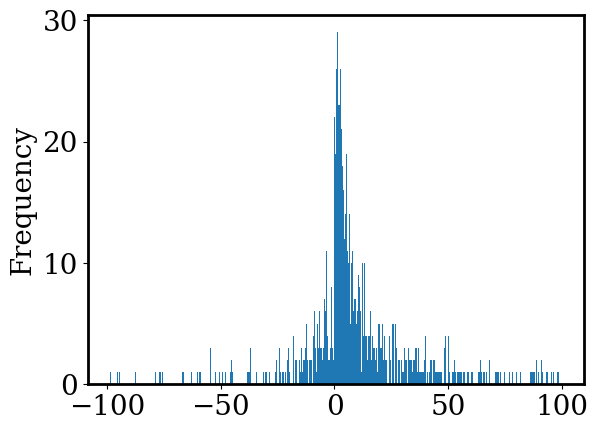

In [276]:
filter = np.abs(KPA_flux_df_22_Rib.Rib) < 100
ax = KPA_flux_df_22_Rib.loc[filter].Rib.plot.hist(bins=1000)
#ax.set_xlim([-1000,1000])
#kp_met_df_temp_qc_30min

In [303]:
#take surface sonic temp fromKPB
KPB_flux_df_22 = flux_qc(KPB_data_22).copy()
KPB_flux_df_22['date_time(MST)'] = pd.to_datetime(KPB_flux_df_22.date + ' ' + KPB_flux_df_22.time)
KPB_flux_df_22_temp = pd.DataFrame()
KPB_flux_df_22_temp[['sonic_temperature_3m','date_time(MST)']] = KPB_flux_df_22[['sonic_temperature','date_time(MST)']]
KPB_flux_df_22_temp.set_index('date_time(MST)',inplace=True)

KPB_flux_df_22_temp.sonic_temperature_3m
#KPA_flux_df_22_Rib['sonic_temperature_3m'] = 

In [314]:
KPA_flux_df_22_Rib = pd.merge(KPA_flux_df_22_Rib,KPB_flux_df_22_temp,on = 'date_time(MST)', how='left')

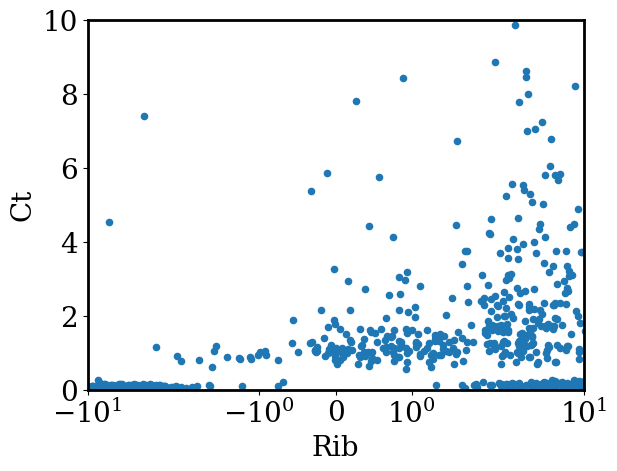

<Figure size 640x480 with 0 Axes>

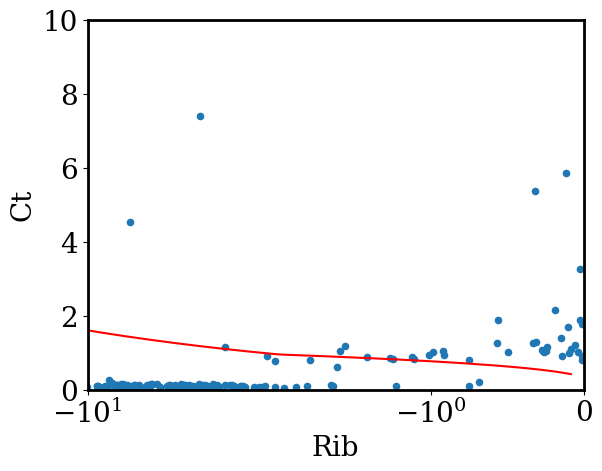

<Figure size 640x480 with 0 Axes>

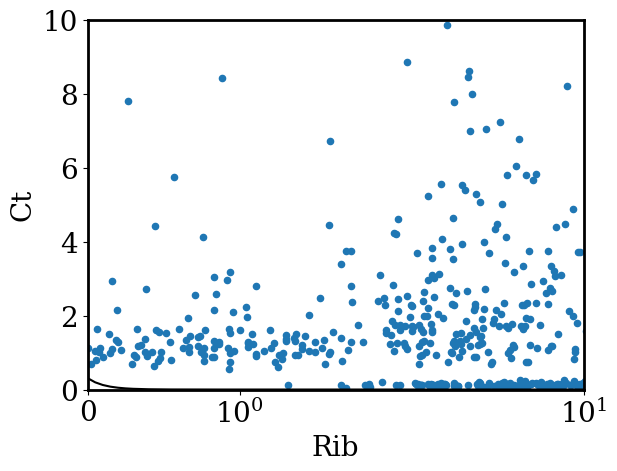

In [350]:
momentum_flag = False

f1 = KPA_flux_df_22_Rib.sonic_temperature_3m.notna()
f2 = np.abs(KPA_flux_df_22_Rib.Rib) < 100

plot_coefficient_df = pd.DataFrame()
plot_coefficient_df['u*'] = KPA_flux_df_22_Rib.loc[f1 & f2]['u*']
plot_coefficient_df['U_10'] = KPA_flux_df_22_Rib.loc[f1 & f2]['wind_speed']
plot_coefficient_df['T*'] = KPA_flux_df_22_Rib.loc[f1 & f2]['T*']
plot_coefficient_df['Tv'] = KPA_flux_df_22_Rib.loc[f1 & f2]['sonic_temperature']
plot_coefficient_df['Tv_surf'] = KPA_flux_df_22_Rib.loc[f1 & f2]['sonic_temperature_3m']
plot_coefficient_df['Rib'] = KPA_flux_df_22_Rib.loc[f1 & f2]['Rib']


plot_coefficient_df['Cu'] = plot_coefficient_df['u*']/plot_coefficient_df['U_10']
plot_coefficient_df['Ct'] = plot_coefficient_df['T*']/(plot_coefficient_df['Tv']-plot_coefficient_df['Tv_surf'])

x_plot_unstable = np.arange(plot_coefficient_df['Rib'].min(),0,0.1)
x_plot_stable = np.arange(0,plot_coefficient_df['Rib'].max(),0.05)

if momentum_flag== True :
    ax1 = plot_coefficient_df.plot.scatter(x='Rib', y='Cu')
    ax1.set_xscale('symlog')
    ax1.set_ylim([0,0.4])
    ax1.set_xlim([-10,10])

    
    plt.figure()
    ax2 = plot_coefficient_df.loc[plot_coefficient_df['Rib']<0].plot.scatter(x='Rib', y='Cu')
    ax2.set_xscale('symlog')
    ax2.set_ylim([0,0.4])
    ax2.set_xlim([-10,0])

    ax2 = plt.plot(x_plot_unstable,0.08*(1-3.26*x_plot_unstable)**(1/3),'r')


    plt.figure()
    ax3 = plot_coefficient_df.loc[plot_coefficient_df['Rib']>0].plot.scatter(x='Rib', y='Cu')
    ax3.set_xscale('symlog')
    ax3.set_ylim([0,0.4])
    ax3.set_xlim([0,10])

    ax3 = plt.plot(x_plot_stable,(0.08*np.exp(-3.11*x_plot_stable)),'k')
    

else:
    ax1 = plot_coefficient_df.plot.scatter(x='Rib', y='Ct')
    ax1.set_xscale('symlog')
    ax1.set_ylim([0,10])
    ax1.set_xlim([-10,10])

    plt.figure()
    ax2 = plot_coefficient_df.loc[plot_coefficient_df['Rib']<0].plot.scatter(x='Rib', y='Ct')
    ax2.set_xscale('symlog')
    ax2.set_ylim([0,10])
    ax2.set_xlim([-10,0])
    
    ax2 = plt.plot(x_plot_unstable,0.34*(1-10.34*x_plot_unstable)**(1/3),'r')


    plt.figure()
    ax3 = plot_coefficient_df.loc[plot_coefficient_df['Rib']>0].plot.scatter(x='Rib', y='Ct')
    ax3.set_xscale('symlog')
    ax3.set_ylim([0,10])
    ax3.set_xlim([0,10])
    
    ax3 = plt.plot(x_plot_stable,(0.31*np.exp(-9.25*x_plot_stable)),'k')
    

